In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import sklearn

In [3]:
df_2018 = pd.read_csv('2018_public_use_data.csv')
print(df_2018.shape)
# df_2018.dtypes

(6436, 1181)


In [4]:
df_filled = df_2018.copy()

In [5]:
df_filled.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,ZLTEXPC,ZPKLT,ZPKLTINOUT,ZPKLTN,ZWINTYP,ZTINT,ZREFL,ZAWN,ZSKYLT,ZDAYLTP
3565,3566,4,9,2,500001,9,6,7,1,1,...,0,0,0,0,0,0,0,0,0,0
3886,3887,1,1,25,24000,4,3,6,2,1,...,0,0,9,9,0,0,0,0,0,0
1199,1200,3,6,26,2050,2,5,5,2,2,...,0,0,0,0,0,0,0,0,0,0
3566,3567,1,2,25,2500,2,1,4,2,1,...,0,0,9,9,0,0,0,0,0,0
2646,2647,4,9,2,50000,5,3,7,2,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_codebook = pd.read_csv('2018cbecs_codebook_wDicts.csv')
df_codebook.head()

,category,file_order,col_name,col_type,length,col_description,codes,codes_dict
0,0,1,PUBID,Char,5,Public use file building identifier,00001 - 06436,{'00001 - 06436': 'continuous numerical range'}
1,0,2,REGION,Char,1,Census Region,1=Northeast\n2=Midwest\n3=South\n4=West,"{'1': 'Northeast', '2': 'Midwest', '3': 'South..."
2,0,3,CENDIV,Char,1,Census division,1=New England\n2=Middle Atlantic \n3=East Nor...,"{'1': 'New England', '2': 'Middle Atlantic', '..."
3,0,4,PBA,Num,8,Principal building activity,1=Vacant\n2=Office\n4=Laboratory\n5=Nonrefrige...,"{'1': 'Vacant', '2': 'Office', '4': 'Laborator..."
4,1,5,SQFT,Num,8,Square footage,"1,001 - 2,100,000","{'1,001 - 2,100,000': 'continuous numerical ra..."


In [7]:
print(df_codebook.category.unique())

[0 1 2 3 4 5 6 7]


In [8]:
df_codebook_2012 = pd.read_csv('2012cbecs_codebook_wDicts.csv')
df_codebook_2012.head()

,category,file_order,col_name,col_type,length,format,col_description,codes,codes_dict
0,0,1.0,PUBID,Char,5.0,NaN,Building identifier,00001 - 06720,{'00001 - 06720': 'continuous numerical range'}
1,0,2.0,REGION,Char,1.0,$REGION.,Census region,'1' = 'Northeast'\r\n'2' = 'Midwest'\r\n'3' = ...,"{'1': 'Northeast', '2': 'Midwest', '3': 'South..."
2,0,3.0,CENDIV,Char,1.0,$CENDIV.,Census division,'1' = 'New England'\r\n'2' = 'Middle Atlantic'...,"{'1': 'New England', '2': 'Middle Atlantic', '..."
3,0,4.0,PBA,Char,2.0,$PBA.,Principal building activity,'01' = 'Vacant'\r\n'02' = 'Office'\r\n'04' = '...,"{'01': 'Vacant', '02': 'Office', '04': 'Labora..."
4,1,5.0,FREESTN,Char,1.0,$YES.,Freestanding building,1' = 'Yes'\r\nMissing='No',"{'1': 'Yes', 'Missing': 'No'}"


In [9]:
col_name_2012 = df_codebook_2012.col_name.values.tolist()
col_name_2018 = df_codebook.col_name.values.tolist()

In [10]:
keep_var = df_codebook[df_codebook['col_name'].isin(col_name_2012)]
keep_var.shape

## 330 overlapping variables 

(330, 8)

In [11]:
keep_var_list = keep_var.col_name.values.tolist()

In [12]:
## Read 2012 Data

df_2012 = pd.read_csv('2012cbecs_train-data.csv')
df_2012_cons = pd.read_csv('2012cbecs_consumption-data.csv')

In [13]:
df_2012.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,NFLOOR,BASEMNT,FLCEILHT,NELVTR,NESLTR,...,TRIM,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT
2247,2248,3,5,15,2500,1,0.0,12,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,2,1.0,0.0,1.0,0.0
3125,3126,2,3,5,1500,1,0.0,15,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,4,0.0,0.0,0.0,0.0
414,415,3,5,2,490000,26,1.0,13,11.0,0.0,...,0.0,0.0,0.0,2.0,1.0,2,1.0,0.0,0.0,0.0
3682,3683,2,4,2,28000,1,0.0,18,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,3,1.0,1.0,1.0,0.0
4562,4563,3,7,5,44000,1,0.0,10,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,2,0.0,0.0,0.0,0.0


In [14]:
df_2012 = df_2012[df_2012.columns.intersection(keep_var_list)]
df_2012.shape

(6720, 330)

In [15]:
df_2012_cons.sample(5)

,HDD65,CDD65,MFHTBTU,MFCLBTU,MFVNBTU,MFWTBTU,MFLTBTU,MFCKBTU,MFRFBTU,MFOFBTU,...,MFUSED,DHUSED,DHHT1,DHHT2,DHCOOL,DHCOOK,DHWATR,DHMANU,DHOTH,PUBCLIM
5690,4439,1461,67319430.0,9097102.0,18242545.0,38020295.0,12555722.0,16995081.0,4481093.0,2161456.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3399,5731,1029,77945.0,0.0,1597.0,15638.0,3433.0,0.0,1660.0,5700.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1093,4078,1797,196226.0,14824.0,41597.0,186817.0,27348.0,55259.0,21434.0,38591.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4714,6348,748,226791.0,0.0,5299.0,2502.0,21231.0,0.0,401.0,705.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4727,2839,917,331570.0,62105.0,39910.0,73763.0,42749.0,0.0,1763.0,15751.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [16]:
category_map = {}
for cat in df_codebook.category.unique():
    category_cols_df = df_codebook[df_codebook['category'] == cat]
    cat_cols = []
    for col in category_cols_df.col_name.values:
        if type(col) == str:
            cat_cols.append(col)
    category_map[cat] = cat_cols

In [17]:
keep_cols = []
for wanted_cols in category_map.values():
    for col in wanted_cols:
        keep_cols.append(col)
print(len(keep_cols))

561


In [18]:
def find_num_cat_cols(list_of_dfs, category_num, list_of_numcols, list_of_catcols):
    numeric_cols = []
    categorical_cols = []
    for col in list_of_dfs[category_num].columns:
        if col in list_of_numcols:
            numeric_cols.append(col)
        elif col in list_of_catcols:
            categorical_cols.append(col)
    df_category = list_of_dfs[category_num].copy()[numeric_cols + categorical_cols]
    return df_category, numeric_cols, categorical_cols

In [19]:
def create_new_codebook(codebook, cols):
    new_codebook = dict(codebook.set_index('col_name').loc[cols].codes_dict)
    return new_codebook

In [20]:
def create_replace_map(new_codebook, category_df, return_errors=False):
    replace_map = {}
    error_map = {}
    for col_name, codebook in new_codebook.items():
        try:
            codebook = json.loads(codebook.replace("'", '"'))
        except ValueError as e:
            print(f'JSONDecodeError on column {col_name}')
            error_map[col_name] = (col_name, e)
            codebook = codebook.replace('"', '')
            codebook = json.loads(codebook.replace("'", '"'))
        finally:
            if col_name in category_df.columns:
                for code, code_val in codebook.items():
                    if code == '2' and code_val == 'No':
                        replace_map[col_name] = 2
    
    if return_errors == True:
        return replace_map, error_map
    else:
        return replace_map

In [21]:
def build_hist(column_list):
    figname = 0
    for column in column_list:
        plt.figure(figname)
        sns.set(rc = {'figure.figsize':(2,2)})
        sns.histplot(data=df, x=column, kde=True)
        figname += 1

In [22]:
df_filled = df_filled[keep_cols]
print(df_filled.shape)
df_filled.sample(5)

(6436, 561)


,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,LTEXPC,PKLT,PKLTINOUT,PKLTN,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
2522,2523,4,9,2,5500,3,4,3,2,3,...,4,2,.,5,1,1,2,2,2,20
5852,5853,4,8,5,5000,2,8,4,2,2,...,1,2,.,5,3,2,2,1,1,50
1289,1290,3,7,18,200001,8,1,1,2,1,...,4,1,2,410,3,2,2,2,2,5
5971,5972,1,2,26,7000,3,4,6,1,3,...,1,1,2,10,2,2,2,2,2,5
1341,1342,2,3,13,2300,2,5,5,2,2,...,2,1,2,5,4,.,.,.,.,.


In [23]:
category_dfs = {}
for cat_name, cat_list in category_map.items():
    category_dfs[cat_name] = df_filled[cat_list]
category_dfs[0].sample(10)

,PUBID,REGION,CENDIV,PBA
4435,4436,1,1,14
4226,4227,1,1,14
3129,3130,3,6,91
1779,1780,4,8,23
2630,2631,4,9,5
5640,5641,3,5,2
2584,2585,2,4,14
5966,5967,4,8,25
646,647,1,2,14
1327,1328,2,4,25


In [24]:
codebook_check = df_codebook.copy().set_index('col_name')
num_cols = []
cat_cols = []
for col in codebook_check.index:
    if codebook_check.loc[col].col_type == 'Num':
        num_cols.append(col)
    else:
        cat_cols.append(col)
print(len(num_cols))
print(len(cat_cols))

558
3


In [25]:
df_filled = df_filled[df_filled.columns.intersection(keep_var_list)]
df_filled.shape

(6436, 330)

In [26]:
df_filled.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
6011,6012,3,5,15,10750,4,3,1,2,1,...,2,2,4,1,3,1,2,1,2,0
2291,2292,1,2,12,30000,5,1,3,2,2,...,2,2,4,1,2,1,2,2,2,5
4695,4696,1,2,12,265000,8,2,4,1,2,...,2,2,2,1,2,1,2,1,2,10
783,784,3,7,14,166000,7,1,6,2,2,...,2,2,2,1,1,2,2,2,2,15
2965,2966,2,4,25,114000,7,3,6,2,1,...,2,2,1,1,4,.,.,.,.,.


In [27]:
df_codebook = create_new_codebook(df_codebook, list(df_filled.columns))
replace_map, error_map = create_replace_map(df_codebook, df_filled, return_errors=True)
print(error_map)

JSONDecodeError on column BLDSHP
JSONDecodeError on column WTHTEQ
{'BLDSHP': ('BLDSHP', JSONDecodeError("Expecting ',' delimiter: line 1 column 127 (char 126)")), 'WTHTEQ': ('WTHTEQ', JSONDecodeError("Expecting ',' delimiter: line 1 column 43 (char 42)"))}


In [28]:
df_filled = df_filled.replace(to_replace=replace_map, value=0).fillna(value=0)
df_filled = df_filled.replace(to_replace='.', value=0)
df_filled[0:20]

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
0,1,3,5,2,210000,8,1,4,0,1,...,2,2,2,1,2,2,2,2,1,0
1,2,4,9,2,28000,5,1,6,1,1,...,2,2,1,1,1,1,1,2,1,15
2,3,3,5,8,2100,2,1,4,0,3,...,2,2,4,1,2,2,2,1,2,40
3,4,3,7,5,240000,8,2,6,1,1,...,2,2,2,1,2,1,2,2,2,5
4,5,1,2,5,295000,8,3,6,0,1,...,2,2,4,1,2,1,2,2,1,0
5,6,3,5,14,94000,6,1,6,1,1,...,2,2,4,1,2,2,2,2,2,20
6,7,4,8,14,41000,5,1,4,1,1,...,2,2,1,1,2,1,2,2,2,75
7,8,2,3,5,122000,7,1,6,1,1,...,1,2,4,1,3,2,2,1,2,0
8,9,4,8,25,96000,6,3,6,1,1,...,2,2,3,1,1,1,2,2,2,40
9,10,1,2,14,220000,8,1,1,0,1,...,2,2,4,1,2,1,2,1,2,10


In [29]:
objects = list(df_filled.select_dtypes(['object']).columns)
objects

['BASEMNT',
 'ELEVTR',
 'NELVTR',
 'ESCLTR',
 'NESLTR',
 'RENOV',
 'RENCOS',
 'RENADD',
 'RENRDC',
 'RENINT',
 'RENRFF',
 'RENWIN',
 'RENHVC',
 'RENLGT',
 'RENPLB',
 'RENELC',
 'RENINS',
 'RENSAF',
 'RENSTR',
 'RENOTH',
 'DRYCL',
 'VACANT',
 'RWSEAT',
 'PBSEAT',
 'EDSEAT',
 'FDSEAT',
 'HCBED',
 'NRSBED',
 'LODGRM',
 'COURT',
 'FEDFAC',
 'FACACT',
 'MANIND',
 'PLANT',
 'FACDST',
 'FACDHW',
 'FACDCW',
 'FACELC',
 'BLDPLT',
 'GOVTYP',
 'OWNOCC',
 'OWNPPR',
 'NWNPPR',
 'NWNOPR',
 'WHOPPR',
 'OCCUPYP',
 'LODOCCP',
 'FKTYPE',
 'HEATP',
 'HTLS50',
 'PKGHT',
 'FURNAC',
 'SLFCON',
 'BOILER',
 'HTPMPH',
 'STHW',
 'OTHTEQ',
 'BLRAIR',
 'BLRDUCT',
 'BLRFNCL',
 'BLRRAD',
 'HPHAIR',
 'HPHGRD',
 'HPHDUAL',
 'HPHWTR',
 'HPHVRF',
 'MAINHT',
 'NWMNHT',
 'COOLP',
 'RCAC',
 'PKGCL',
 'CHILLR',
 'HTPMPC',
 'ACWNWL',
 'EVAPCL',
 'OTCLEQ',
 'CHWT',
 'HPCAIR',
 'HPCGRD',
 'HPCDUAL',
 'HPCWTR',
 'CHLAIR',
 'CHLFNCL',
 'CHLBEAM',
 'CHLAIRCL',
 'CHLWTRCL',
 'CHLABSRP',
 'MAINCL',
 'NWMNCL',
 'EMCS',
 'EMCSLT',
 

In [30]:
for col in objects:
    df_filled[col] = df_filled[col].astype(str).astype(int)

In [31]:
list(df_filled.select_dtypes(['object']).columns)

[]

In [32]:
print(df_filled.NFLOOR.dtype)
print(df_filled.BASEMNT.dtype)
print(df_filled.FLCEILHT.dtype)
print(df_filled.NELVTR.dtype)
print(df_filled.NESLTR.dtype)
print(df_filled.RWSEAT.dtype)
print(df_filled.PBSEAT.dtype)
print(df_filled.HCBED.dtype)
print(df_filled.NRSBED.dtype)
print(df_filled.LODGRM.dtype)
print(df_filled.NOCC.dtype) 
print(df_filled.NOCCAT.dtype)
print(df_filled.XRAYN.dtype)
print(df_filled.TVVIDEON.dtype)
print(df_filled.RFGCOMPN.dtype)
print(df_filled.RFGRSN.dtype)
print(df_filled.SERVERN.dtype)
print(df_filled.RFGCOMP.dtype)

int64
int32
int64
int32
int32
int32
int32
int32
int32
int32
int64
int64
int32
int32
int32
int32
int32
int32


In [33]:
## Adjusting for weird values

df_filled.NFLOOR.replace(to_replace=994, value=10, inplace=True)
df_filled.NFLOOR.replace(to_replace=995, value=15, inplace=True)
df_filled.BASEMNT.replace(to_replace=995, value=5, inplace=True)
df_filled.FLCEILHT.replace(to_replace=995, value=51, inplace=True)
df_filled.NELVTR.replace(to_replace=995, value=31, inplace=True)
df_filled.NESLTR.replace(to_replace=995, value=11, inplace=True)
df_filled.RWSEAT.replace(to_replace=99995, value=2001, inplace=True)
df_filled.PBSEAT.replace(to_replace=999995, value=15001, inplace=True)
df_filled.HCBED.replace(to_replace=9995, value=251, inplace=True)
df_filled.NRSBED.replace(to_replace=9995, value=251, inplace=True)
df_filled.LODGRM.replace(to_replace=99995, value=1001, inplace=True)
df_filled.NOCC.replace(to_replace=996, value=0, inplace=True) 
df_filled.NOCCAT.replace (to_replace=996, value=0, inplace=True) 
df_filled.XRAYN.replace(to_replace=995, value=21, inplace=True)
df_filled.TVVIDEON.replace(to_replace=995, value=201, inplace=True) 
df_filled.RFGCOMPN.replace(to_replace=9995, value=1001, inplace=True)
df_filled.RFGRSN.replace(to_replace=99995, value=1001, inplace=True)
df_filled.SERVERN.replace(to_replace=9995, value=501, inplace=True)
df_filled.RFGCOMP.replace(to_replace=99995, value=0, inplace=True)

Training Target 

In [34]:
col_list = ['MFHTBTU',
'MFCLBTU',
'MFVNBTU',
'MFWTBTU',
'MFLTBTU',
'MFCKBTU',
'MFRFBTU',
'MFOFBTU',
'MFPCBTU',
'MFOTBTU',
'ELHTBTU',
'ELCLBTU',
'ELVNBTU',
'ELWTBTU',
'ELLTBTU',
'ELCKBTU',
'ELRFBTU',
'ELOFBTU',
'ELPCBTU',
'ELOTBTU',
'NGHTBTU',
'NGCLBTU',
'NGWTBTU',
'NGCKBTU',
'NGOTBTU',
'FKHTBTU',
'FKCLBTU',
'FKWTBTU',
'FKCKBTU',
'FKOTBTU',
'DHHTBTU',
'DHCLBTU',
'DHWTBTU',
'DHCKBTU',
'DHOTBTU']
y_train = pd.DataFrame(columns=["energy_consumption"])
y_train["energy_consumption"]=(df_2012_cons[col_list].sum(axis=1))
y_train.sample(5)

,energy_consumption
3613,102088.0
588,426220.0
5639,6825046.0
3630,20606876.0
2485,40343622.0


In [74]:
y_train.describe()

,energy_consumption
count,6.554000e+03
mean,3.493180e+07
std,1.226143e+08
min,6.000000e+00
25%,5.362850e+05
50%,2.768502e+06
75%,1.692755e+07
max,2.963733e+09


In [35]:
train_total = df_2012.join(y_train)
train_total.shape

(6720, 331)

In [36]:
train_total = train_total[train_total.energy_consumption != 0]
train_total.shape

(6554, 331)

In [37]:
X_train1 = train_total.drop(columns=['energy_consumption'])
y_train = pd.DataFrame(train_total['energy_consumption'])

In [38]:
X_train1.shape

(6554, 330)

In [39]:
y_train.shape

(6554, 1)

In [40]:
X_test = df_filled.copy()

# PCA

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

lr = LinearRegression()
scaler_train = StandardScaler()
pca_train = PCA()

X_train = X_train1.to_numpy(dtype=float, copy=True)
X_train_scaled = scaler_train.fit_transform(X_train)
X_train_pca = pca_train.fit_transform(X_train_scaled)

In [42]:
pca_exp_var = pd.DataFrame(pca_train.explained_variance_ratio_,)
pca_exp_var.T

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
0,0.104419,0.030132,0.023229,0.021101,0.018969,0.017866,0.016023,0.015817,0.014971,0.013387,...,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,2.376989e-34


In [43]:
# plt.figure(figsize=(5,5))
# plt.plot(np.cumsum(pca_train.explained_variance_ratio_))
# plt.xlabel('num components')
# plt.ylabel('cumulative explained variance')

<AxesSubplot:xlabel='0', ylabel='1'>

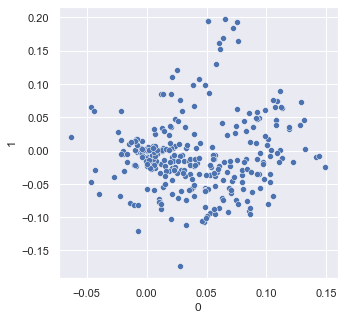

In [44]:
pca_train_df = pd.DataFrame(pca_train.components_)
sns.set(rc = {'figure.figsize':(5,5)})
sns.scatterplot(x=pca_train_df.T[0], y=pca_train_df.T[1])

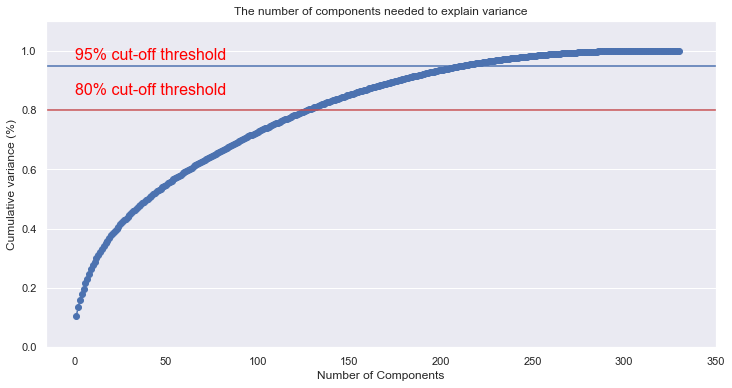

In [45]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 331, step=1)
y = np.cumsum(pca_train.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 400, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.95, color='b', linestyle='-')
plt.text(0.5, 0.97, '95% cut-off threshold', color = 'red', fontsize=16)


ax.grid(axis='x')
plt.show()

# https://www.kaggle.com/code/kushal1506/deciding-n-components-in-pca/notebook

In [46]:
pca_final = PCA(n_components = 200) # INSERT NUMBER OF COMPONENTS
X_train_pca = pca_final.fit_transform(X_train_scaled)

In [47]:
X_train_pca.shape

(6554, 200)

In [48]:
# pca_exp_var = pd.DataFrame(pca_final.explained_variance_ratio_,)
# pca_exp_var.T

In [49]:
## PCA on 2018 data

X_test = X_test.to_numpy(dtype=float, copy=True)
X_test_scaled = scaler_train.transform(X_test)
X_test_pca = pca_final.transform(X_test_scaled)

In [51]:
X_test_pca.shape

(6436, 200)

In [110]:
y_train_final = np.log(y_train).to_numpy().ravel()
# y_train_final = y_train.copy()
# y_train_final = y_train.to_numpy().ravel()

In [111]:
# y_train_final.describe()

In [112]:
X_train_pca.shape

(6554, 200)

In [113]:
y_train_final

array([10.89429189, 16.28185805, 11.26171675, ..., 13.77515096,
       14.83377215, 16.40779144])

In [114]:
# model = lr.fit(X_train_pca, y_train_final)
# y_pred = model.predict(X_test_pca)
from sklearn import svm
regr = svm.SVR(kernel='linear')

In [115]:
model = regr.fit(X_train_pca, y_train_final)

In [116]:
y_pred = model.predict(X_test_pca)

In [117]:
y_pred.shape

(6436,)

In [118]:
y_pred.min()

-1497.7951606942656

In [119]:
predicted = pd.DataFrame(y_pred).rename(columns={0:'predicted'})

In [120]:
predicted.describe()

,predicted
count,6436.000000
mean,55.877606
std,135.217455
min,-1497.795161
25%,15.418467
50%,31.706037
75%,61.882079
max,1551.562292


In [97]:
# predicted[predicted['predicted'] >= np.mean(predicted.values)]

In [98]:
predicted[predicted['predicted'] >= 500].shape

(6428, 1)

In [99]:
predicted[predicted['predicted'] <= -0].shape

(8, 1)

In [100]:
X_test_pca.shape

(6436, 200)

In [64]:
df_outliers=pd.concat([df_filled,predicted],axis=1,join='inner')

In [65]:
df_outliers.shape

(6436, 331)

In [66]:
# df_outliers.to_csv('df_outliers.csv')

In [ ]:
X_test2 = df_outliers.drop(df_outliers[df_outliers.predicted <= -500].index)
X_test_final = X_test2.drop(X_test2[X_test2.predicted >= 500].index)

In [ ]:
X_test2.shape

In [ ]:
X_test_final.shape

In [ ]:
X_test_final = pd.DataFrame(X_test_final)

In [ ]:
X_test_final

In [ ]:
X_test_final.drop(columns=['predicted'], axis=1, inplace=True)

In [ ]:
X_test_final = X_test_final.to_numpy(dtype=float, copy=True)
X_test_scaled_final = scaler_train.transform(X_test_final)
X_test_pca_final = pca_final.transform(X_test_scaled_final)

In [ ]:
model = lr.fit(X_train_pca, y_train_final)
y_pred_final = model.predict(X_test_pca_final)

In [ ]:
y_pred_final.shape

In [ ]:
predicted_final = pd.DataFrame(y_pred_final).rename(columns={0:'predicted'})

In [ ]:
predicted_final.describe()

In [ ]:
# predicted_final['predicted'] = np.exp(predicted_final.predicted)

In [ ]:
# predicted_final.describe()

<AxesSubplot:ylabel='Count'>

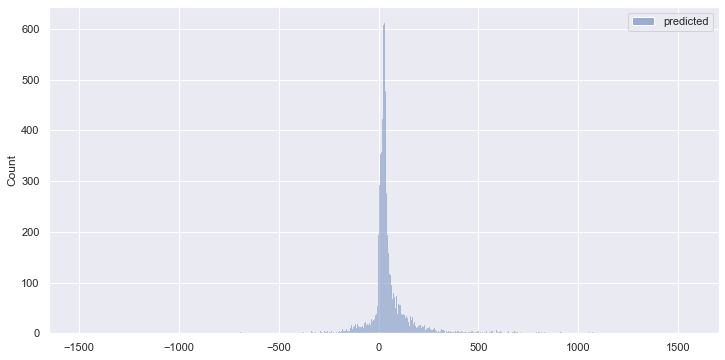

In [121]:
sns.histplot(data=predicted)

In [ ]:
# y_train_final.reset_index(inplace=True, drop=True)

In [122]:
testing = model.predict(X_train_pca)

In [123]:
testing = pd.DataFrame(testing)

In [124]:
testing

,0
0,11.610843
1,16.428256
2,11.758877
3,19.152466
4,16.252545
...,...
6549,16.816735
6550,11.429521
6551,12.754310
6552,14.494212


In [125]:
y_train_final.shape

(6554,)

In [134]:
y_train_final = pd.DataFrame(y_train_final).rename(columns={0:'energy_consumption'})

In [135]:
df1=pd.concat([y_train_final,testing],axis=1,join='inner').rename(columns={'energy_consumption': 'original', 0:'predicted'})
df1

,original,predicted
0,10.894292,11.610843
1,16.281858,16.428256
2,11.261717,11.758877
3,18.388926,19.152466
4,15.159338,16.252545
...,...,...
6549,16.526452,16.816735
6550,8.839277,11.429521
6551,13.775151,12.754310
6552,14.833772,14.494212


In [136]:
df1['residual']= df1['original'] - df1['predicted']
df1

,original,predicted,residual
0,10.894292,11.610843,-0.716551
1,16.281858,16.428256,-0.146398
2,11.261717,11.758877,-0.497160
3,18.388926,19.152466,-0.763540
4,15.159338,16.252545,-1.093207
...,...,...,...
6549,16.526452,16.816735,-0.290283
6550,8.839277,11.429521,-2.590244
6551,13.775151,12.754310,1.020841
6552,14.833772,14.494212,0.339560


<AxesSubplot:xlabel='predicted', ylabel='residual'>

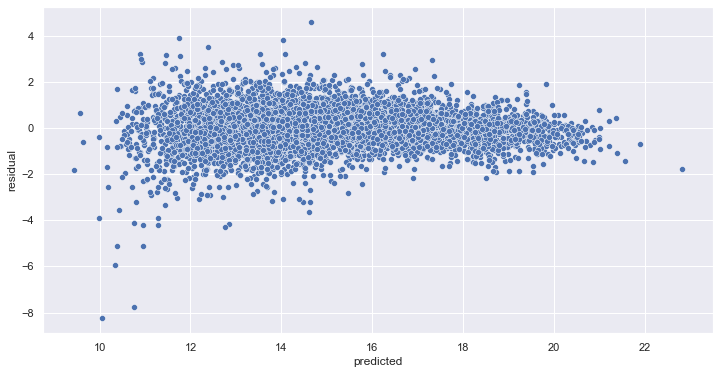

In [137]:
sns.scatterplot(data=df1, x="predicted", y="residual")

In [138]:
model.score(X_train_pca, y_train_final)

0.8793805693150549

In [142]:
coef = pd.DataFrame(model.coef_)

In [143]:
coef

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.353069,-0.084464,0.121781,0.018545,-0.051537,-0.100163,-0.003299,0.032099,-0.056949,0.08065,...,-0.020819,-0.029815,-0.027673,0.136768,0.030286,-0.031316,-0.02944,-0.096012,0.013355,-0.063853
